# Project-2 | Regression
### House Price Prediction using Multiple Regression Algorithms
- This project is a practice project after completing 100 days of ML from **CampusX Youtube channel**. To showcase the skills learned from that session.
- **Objective:** - To Predict house prices based on property features and compare the performance of multiple regression models.

### Dataset Summary
- **Dataset Name:** Real Estate Valuation Dataset
- **Source:** UCI Machine Learning Repository
- **Problem Type:** Supervised Learning Regression

In [10]:
# importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load dataset
df = pd.read_csv('data.csv')

### 1. Understanding dataset

In [12]:
# first 5 rows of dataset
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
# removing unnecessary column
df=df.drop('No',axis=1)

In [14]:
df.columns = [
    "transaction_date",
    "house_age",
    "distance_to_mrt",
    "num_convenience_stores",
    "latitude",
    "longitude",
    "house_price"
]

In [17]:
# checking missing value
df.isnull().sum()

transaction_date          0
house_age                 0
distance_to_mrt           0
num_convenience_stores    0
latitude                  0
longitude                 0
house_price               0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_date        414 non-null    float64
 1   house_age               414 non-null    float64
 2   distance_to_mrt         414 non-null    float64
 3   num_convenience_stores  414 non-null    int64  
 4   latitude                414 non-null    float64
 5   longitude               414 non-null    float64
 6   house_price             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [16]:
df.describe()

,transaction_date,house_age,distance_to_mrt,num_convenience_stores,latitude,longitude,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### 2. Visualization and EDA

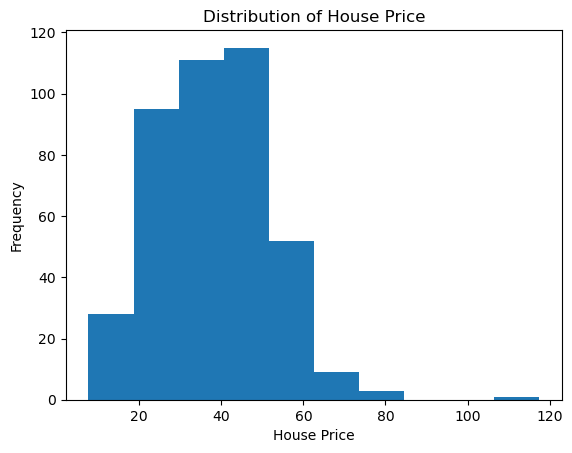

In [18]:
# Distribution of target variable
plt.figure()
plt.hist(df["house_price"])
plt.title("Distribution of House Price")
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.show()

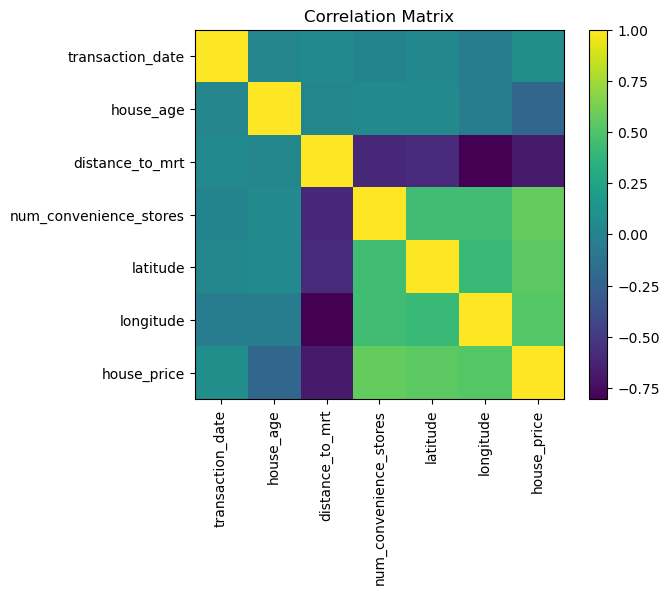

In [19]:
# Correlation heatmap (manual via imshow)
corr = df.corr()
plt.figure()
plt.imshow(corr)
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

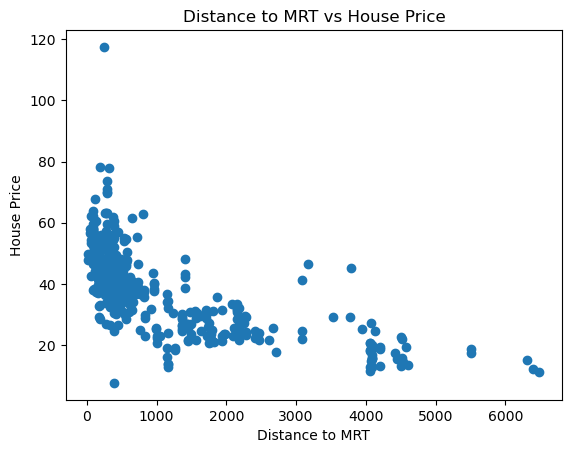

In [20]:
# Scatter: Distance to MRT vs Price
plt.figure()
plt.scatter(df["distance_to_mrt"], df["house_price"])
plt.xlabel("Distance to MRT")
plt.ylabel("House Price")
plt.title("Distance to MRT vs House Price")
plt.show()

### 3. Preprocessing

In [21]:
# importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
X = df.drop("house_price", axis=1)
y = df["house_price"]

# splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. Model training and Evaluation

In [24]:
# importing algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [25]:
# importing metrics for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

In [29]:
results = []

for name, model in models.items():
    if name in ["SVR", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

In [30]:
# Create results table
results_df = pd.DataFrame(
    results, columns=["Model", "MAE", "RMSE", "R2 Score"]
)

results_df

,Model,MAE,RMSE,R2 Score
0,Linear Regression,5.305356,7.314754,0.681058
1,Ridge Regression,5.499841,7.476480,0.666799
2,Lasso Regression,5.701241,7.717488,0.644971
3,Decision Tree,5.931325,8.153002,0.603770
4,Random Forest,3.959689,5.693072,0.806801
5,Gradient Boosting,3.909242,5.846075,0.796277
6,SVR,5.471055,7.585271,0.657031
7,KNN,4.527952,6.403178,0.755599
